# Data Cleaning and Normalization

The goal of this notebook is to make sure that the data loaded makes sense, validate it's layout and perform some basics data cleaning steps on the dataset to smooth some rough edges and facilitate further analytics.

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
# Loading data back from the CSV file to a Pandas DataFrame
hs_dataframe = pd.read_csv('hearthstone.csv')
hs_dataframe.set_index('cardId', inplace=True)
hs_dataframe.head()

,name,cardSet,type,rarity,mechanics_list,mechanics_count,playerClass,faction,cost,health,attack,collectible,race,artist,text,flavor,locale
cardId,,,,,,,,,,,,,,,,,
HERO_05a,Alleria Windrunner,Hero Skins,Hero,Epic,NaN,0,Hunter,NaN,NaN,30.0,NaN,True,NaN,NaN,NaN,NaN,enUS
HERO_08b,Khadgar,Hero Skins,Hero,Epic,NaN,0,Mage,NaN,NaN,30.0,NaN,True,NaN,NaN,NaN,NaN,enUS
HERO_04a,Lady Liadrin,Hero Skins,Hero,Epic,NaN,0,Paladin,NaN,NaN,30.0,NaN,True,NaN,NaN,NaN,NaN,enUS
HERO_01a,Magni Bronzebeard,Hero Skins,Hero,Epic,NaN,0,Warrior,NaN,NaN,30.0,NaN,True,NaN,NaN,NaN,NaN,enUS
HERO_08a,Medivh,Hero Skins,Hero,Epic,NaN,0,Mage,NaN,NaN,30.0,NaN,True,NaN,NaN,NaN,NaN,enUS


In [121]:
# Checking Distinct values of some columns, to see whether we need them or not
# First Analysis - Cardset Column (There are some 'Card Sets' that we must ignore)
hs_dataframe['cardSet'].unique()

# To avoid comparing 'apples and oranges' we have to drop some of the groups that make no sense
hs_dataframe = hs_dataframe[~hs_dataframe['cardSet'].isin(['Hero Skins', 'Debug', 'Tavern Brawl', 'Missions', 'Credits'])]
hs_dataframe.head()

,name,cardSet,type,rarity,mechanics_list,mechanics_count,playerClass,faction,cost,health,attack,collectible,race,artist,text,flavor,locale
cardId,,,,,,,,,,,,,,,,,
CS2_188o,'Inspired',Classic,Enchantment,NaN,OneTurnEffect,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,This minion has +2 Attack this turn.,NaN,enUS
EX1_561e,Alexstrasza's Fire,Classic,Enchantment,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health set to 15.,NaN,enUS
CS2_038e,Ancestral Spirit,Classic,Enchantment,NaN,NaN,0,Shaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<b>Deathrattle:</b> Resummon this minion.,NaN,enUS
NEW1_008b,Ancient Secrets,Classic,Spell,NaN,NaN,0,Druid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restore 5 Health.,NaN,enUS
NEW1_008a,Ancient Teachings,Classic,Spell,NaN,NaN,0,Druid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Draw a card.,NaN,enUS


In [122]:
# Filling NaN and Null values of Cost, Health and Attack columns with ZERO
hs_dataframe['cost'].fillna(0, inplace=True)
hs_dataframe['health'].fillna(0, inplace=True)
hs_dataframe['attack'].fillna(0, inplace=True)

hs_dataframe.head()

,name,cardSet,type,rarity,mechanics_list,mechanics_count,playerClass,faction,cost,health,attack,collectible,race,artist,text,flavor,locale
cardId,,,,,,,,,,,,,,,,,
CS2_188o,'Inspired',Classic,Enchantment,NaN,OneTurnEffect,1,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,This minion has +2 Attack this turn.,NaN,enUS
EX1_561e,Alexstrasza's Fire,Classic,Enchantment,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,Health set to 15.,NaN,enUS
CS2_038e,Ancestral Spirit,Classic,Enchantment,NaN,NaN,0,Shaman,NaN,0.0,0.0,0.0,NaN,NaN,NaN,<b>Deathrattle:</b> Resummon this minion.,NaN,enUS
NEW1_008b,Ancient Secrets,Classic,Spell,NaN,NaN,0,Druid,NaN,0.0,0.0,0.0,NaN,NaN,NaN,Restore 5 Health.,NaN,enUS
NEW1_008a,Ancient Teachings,Classic,Spell,NaN,NaN,0,Druid,NaN,0.0,0.0,0.0,NaN,NaN,NaN,Draw a card.,NaN,enUS


In [123]:
# Analyzing Locale - Droping it if there's only one value for the whole column
if len(hs_dataframe['locale'].unique()) == 1:
    hs_dataframe.drop('locale', axis=1, inplace=True)
    
hs_dataframe.columns

Index([u'name', u'cardSet', u'type', u'rarity', u'mechanics_list',
       u'mechanics_count', u'playerClass', u'faction', u'cost', u'health',
       u'attack', u'collectible', u'race', u'artist', u'text', u'flavor'],
      dtype='object')

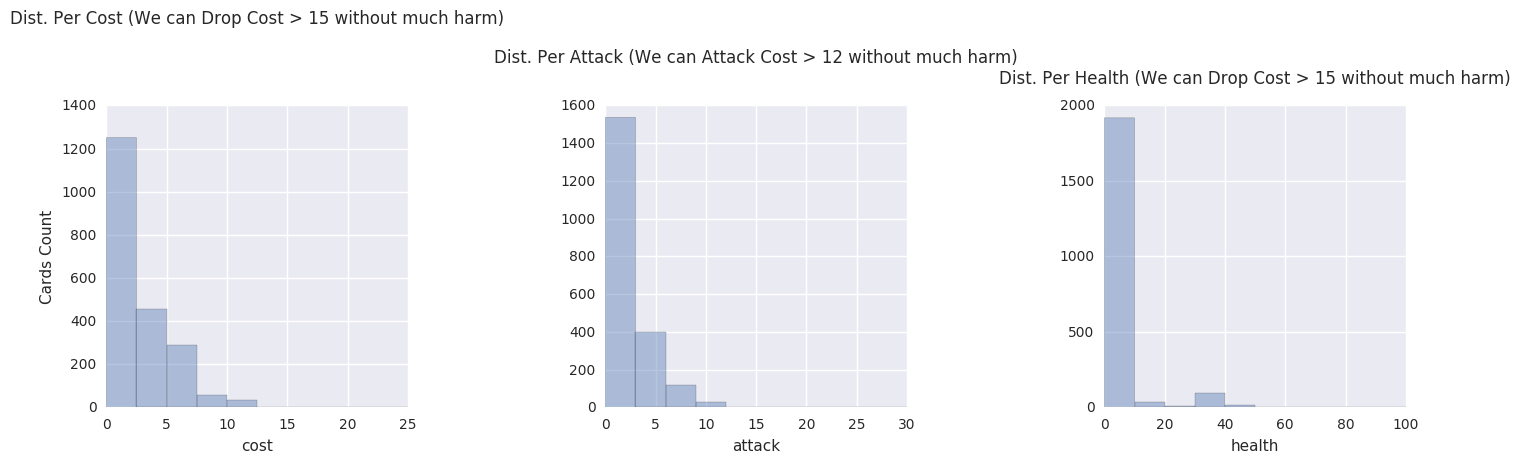

In [124]:
# Analyzing Cost, Attack and Health Distributions
fig, axs = plt.subplots(figsize=(15,5), ncols=3, nrows=1)
sns.distplot(hs_dataframe['cost'], kde=False, bins=10, ax=axs[0])
sns.distplot(hs_dataframe['attack'], kde=False, bins=10, ax=axs[1])
sns.distplot(hs_dataframe['health'], kde=False, bins=10, ax=axs[2])

axs[0].set_ylabel('Cards Count')

axs[0].set_title('Dist. Per Cost (We can Drop Cost > 15 without much harm)', y=1.25)
axs[1].set_title('Dist. Per Attack (We can Attack Cost > 12 without much harm)', y=1.12)
axs[2].set_title('Dist. Per Health (We can Drop Cost > 15 without much harm)', y=1.05)
plt.tight_layout()
plt.show()

# 'Slicing' The dataframe, removing cards with cost > 10
hs_dataframe = hs_dataframe[hs_dataframe['cost'] <= 10]
hs_dataframe = hs_dataframe[hs_dataframe['health'] <= 15]
hs_dataframe = hs_dataframe[hs_dataframe['attack'] <= 12]

In [125]:
# Analyzing Type
hs_dataframe['type'].value_counts()

# Removing unecessary 'cards' from the dataset (like "Hero" and "Hero Power" ones)
hs_dataframe = hs_dataframe[~hs_dataframe['type'].isin(['Hero', 'Hero Power'])]

hs_dataframe['type'].value_counts()

Minion         907
Spell          460
Enchantment    343
Weapon          55
Name: type, dtype: int64

In [126]:
# Analyzing PlayerClass - Droping values that are not actual player classes (if any)
hs_dataframe['playerClass'].value_counts()

# There is a 'Dream' value that we dont need, so we can drop it
hs_dataframe = hs_dataframe[hs_dataframe['playerClass'] != 'Dream']
hs_dataframe['playerClass'].value_counts()

Druid      143
Hunter      91
Warrior     91
Warlock     86
Shaman      85
Paladin     84
Rogue       84
Mage        81
Priest      76
Name: playerClass, dtype: int64

In [127]:
# Changing "NaN" Values of the 'mechanics_list' column by empty strings (for easier comparisson and filtering)
hs_dataframe['mechanics_list'].fillna('', inplace=True)

# Set of unique mechanics
mechanics = set()

# Reading Distinct values of 'Mechanics' from the dataframe
for unique_mechanic in hs_dataframe['mechanics_list'].unique():
    if len(unique_mechanic) > 1:
        
        # Spliting mechanics by '#' for the cases where there are multiple mechanics
        for mechanic in unique_mechanic.split('#'):
            if mechanic not in mechanics:
                mechanics.add(mechanic)

print 'Mechanics Found: [%s]' % ','.join(mechanics)

Mechanics Found: [Poisonous,Overload,HealTarget,Charge,Summoned,Combo,AdjacentBuff,Spell Damage,Taunt,Deathrattle,ImmuneToSpellpower,Morph,Divine Shield,Windfury,Enrage,Aura,AffectedBySpellPower,Battlecry,Silence,Inspire,OneTurnEffect,Stealth,Freeze,InvisibleDeathrattle,Secret]


In [128]:
# Transforming the 'List of Mechanics' into actual 'Binary' Columns (1 means It contains a given effect, 0 means it does not)
for mechanic in mechanics:
    
    for index, row in hs_dataframe.iterrows():
        
        # Assigning "Zero" to it's column value by default
        mechanics_str = row[4]
        
        if mechanic in mechanics_str:
            hs_dataframe.set_value(index, mechanic, 1)
        else:
            hs_dataframe.set_value(index, mechanic, 0)
            
# Droping 'mechanics_list' column, now that we have a set of boolean ones to work with
hs_dataframe.drop('mechanics_list', axis=1, inplace=True)    
hs_dataframe.head()

,name,cardSet,type,rarity,mechanics_count,playerClass,faction,cost,health,attack,...,Aura,AffectedBySpellPower,Battlecry,Silence,Inspire,OneTurnEffect,Stealth,Freeze,InvisibleDeathrattle,Secret
cardId,,,,,,,,,,,,,,,,,,,,,
CS2_188o,'Inspired',Classic,Enchantment,NaN,1,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
EX1_561e,Alexstrasza's Fire,Classic,Enchantment,NaN,0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CS2_038e,Ancestral Spirit,Classic,Enchantment,NaN,0,Shaman,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEW1_008b,Ancient Secrets,Classic,Spell,NaN,0,Druid,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NEW1_008a,Ancient Teachings,Classic,Spell,NaN,0,Druid,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# Writing dataframe to a new CSV
hs_dataframe.to_csv('hearthstone_dataframe.csv')